In [26]:
from PIL import Image
import numpy as np
import glob
import matplotlib.pyplot as plt
import tqdm

## Load Test Data ##

In [3]:
fnames = sorted(glob.glob('./example_images/*.png'))
fnames

['./example_images/LRAH12_20240418T063546.737099Z_PTVR02HM_511371_2_1780_1148_0_164_148_0_rawcolor.png',
 './example_images/LRAH12_20240418T073550.737041Z_PTVR02HM_547415_10_1670_1182_0_228_328_0_rawcolor.png',
 './example_images/LRAH12_20240418T081447.781425Z_PTVR02HM_570788_4_634_346_0_88_172_0_rawcolor.png',
 './example_images/LRAH12_20240419T090730.687888Z_PTVR02HM_554802_23_806_418_0_188_340_0_rawcolor.png']

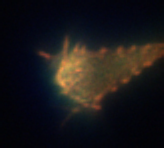

In [4]:

f = fnames[0]
img = Image.open(f)
img

Mean RGB Value is [0.10226372 0.09215848 0.097122  ]
Std RGB Value is [0.15978522 0.11881561 0.06292118]


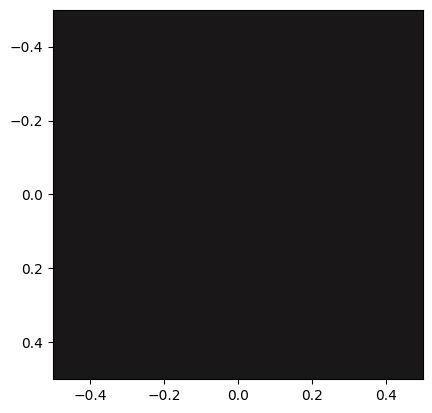

In [24]:
img_data = np.asarray(img)
mean_rgb = img_data.mean(axis=(0,1))
std_rgb = img_data.std(axis=(0,1))

print(f"Mean RGB Value is {mean_rgb/255}")
print(f"Std RGB Value is {std_rgb/255}")
plt.imshow([[tuple(mean_rgb/255)]])

## For all Data ##

In [25]:
fnames = sorted(glob.glob("./test_data/pngs/*.png"))

In [32]:
average_color = np.zeros(3)

for f in tqdm.tqdm(fnames):
    img = np.asarray(Image.open(f))
    img_mean = img.mean(axis=(0,1))/255
    average_color = np.add(average_color,img_mean)

average_color = average_color/len(fnames)

100%|██████████| 56328/56328 [01:16<00:00, 734.23it/s] 


Mean RGB Value is [0.1350966  0.12162398 0.12369811]


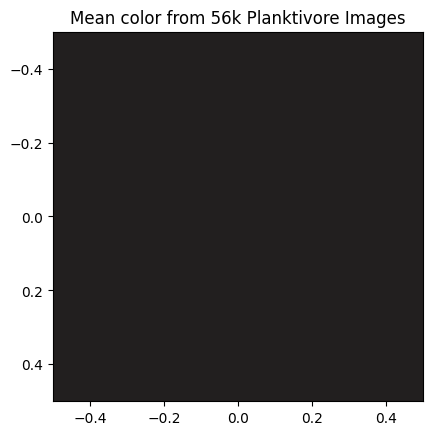

In [35]:
print(f"Mean RGB Value is {average_color}")
plt.imshow([[tuple(average_color)]])
plt.title("Mean color from 56k Planktivore Images")
plt.savefig("./figures/mean_color.png",dpi=300,bbox_inches='tight')